In [3]:
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.integrate import simps

# Integrating the Plasma light source aperture

In order to understand better the light intensity in terms of the monochromator aperture, a integration of the distribution is needed

Trapezoidal rule
area for UV spetrum with 0.30 mm aperture (trapezoidal) = 21679.5
area for UV spetrum with 0.50 mm aperture (trapezoidal) = 37823.5
area for UV spetrum with 0.75 mm aperture (trapezoidal) = 67089.0
area for UV spetrum with 1.00 mm aperture (trapezoidal) = 97602.5
area for UV spetrum with 1.50 mm aperture (trapezoidal) = 131951.0
area for UV spetrum with 2.00 mm aperture (trapezoidal) = 218640.0
area for visible spetrum with 0.30 mm aperture (trapezoidal) = 97769.5
area for visible spetrum with 0.50 mm aperture (trapezoidal) = 90465.0
area for visible spetrum with 0.75 mm aperture (trapezoidal) = 105936.0
area for visible spetrum with 1.00 mm aperture (trapezoidal) = 118339.5
area for visible spetrum with 1.50 mm aperture (trapezoidal) = 122896.5
area for visible spetrum with 2.00 mm aperture (trapezoidal) = 144020.5
Simpson's rule
area for UV spetrum with 0.30 mm aperture (Simpson's) = 21683.999999999996
area for UV spetrum with 0.50 mm aperture (Simpson's) = 37819.5
a

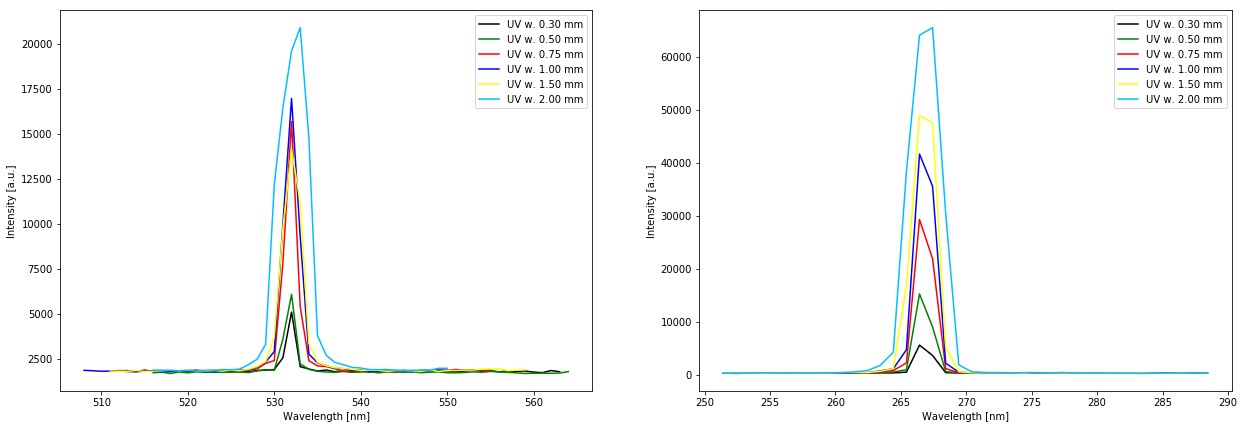

In [4]:
##########################
###    IMPORTING DATA
# Ultra Violet spectrum for apertures 0.3, 0.5, 0.75, 1.0 mm
I_UV_03_x = np.loadtxt('PBLS-Intens-Apertures/UV_0,30mm.txt', skiprows=11, delimiter='\t', usecols=(0))
#print('I_UV_03_x',I_UV_03_x)
I_UV_03_y = np.loadtxt('PBLS-Intens-Apertures/UV_0,30mm.txt', skiprows=11, delimiter='\t', usecols=(2))
#print('I_UV_03_y',I_UV_03_y)
I_UV_04_x = np.loadtxt('PBLS-Intens-Apertures/UV_0,50mm.txt', skiprows=11, delimiter='\t', usecols=(0))
#print('I_UV_04_x',I_UV_04_x)
I_UV_04_y = np.loadtxt('PBLS-Intens-Apertures/UV_0,50mm.txt', skiprows=11, delimiter='\t', usecols=(2))
#print('I_UV_04_y',I_UV_04_y)
I_UV_05_x = np.loadtxt('PBLS-Intens-Apertures/UV_0,75mm.txt', skiprows=11, delimiter='\t', usecols=(0))
#print('I_UV_05_x',I_UV_05_x)
I_UV_05_y = np.loadtxt('PBLS-Intens-Apertures/UV_0,75mm.txt', skiprows=11, delimiter='\t', usecols=(2))
#print('I_UV_05_y',I_UV_05_y)
I_UV_06_x = np.loadtxt('PBLS-Intens-Apertures/UV_1,00mm.txt', skiprows=11, delimiter='\t', usecols=(0))
#print('I_UV_06_x',I_UV_06_x)
I_UV_06_y = np.loadtxt('PBLS-Intens-Apertures/UV_1,00mm.txt', skiprows=11, delimiter='\t', usecols=(2))
#print('I_UV_06_y',I_UV_06_y)
I_UV_07_x = np.loadtxt('PBLS-Intens-Apertures/UV_1,50mm.txt', skiprows=11, delimiter='\t', usecols=(0))
#print('I_UV_07_x',I_UV_07_x)
I_UV_07_y = np.loadtxt('PBLS-Intens-Apertures/UV_1,50mm.txt', skiprows=11, delimiter='\t', usecols=(2))
#print('I_UV_07_y',I_UV_07_y)
I_UV_08_x = np.loadtxt('PBLS-Intens-Apertures/UV_2,00mm.txt', skiprows=11, delimiter='\t', usecols=(0))
#print('I_UV_08_x',I_UV_08_x)
I_UV_08_y = np.loadtxt('PBLS-Intens-Apertures/UV_2,00mm.txt', skiprows=11, delimiter='\t', usecols=(2))
#print('I_UV_08_y',I_UV_08_y)
# Visible spectrum for apertures 0.3, 0.5, 0.75, 1.0 mm
I_Vi_03_x = np.loadtxt('PBLS-Intens-Apertures/Vi_0,30mm.txt', skiprows=11, delimiter='\t', usecols=(0))
#print('I_Vi_03_x',I_Vi_03_x)
I_Vi_03_y = np.loadtxt('PBLS-Intens-Apertures/Vi_0,30mm.txt', skiprows=11, delimiter='\t', usecols=(2))
#print('I_Vi_03_y',I_Vi_03_y)
I_Vi_04_x = np.loadtxt('PBLS-Intens-Apertures/Vi_0,50mm.txt', skiprows=11, delimiter='\t', usecols=(0))
#print('I_Vi_04_x',I_Vi_04_x)
I_Vi_04_y = np.loadtxt('PBLS-Intens-Apertures/Vi_0,50mm.txt', skiprows=11, delimiter='\t', usecols=(2))
#print('I_Vi_04_y',I_Vi_04_y)
I_Vi_05_x = np.loadtxt('PBLS-Intens-Apertures/Vi_0,75mm.txt', skiprows=11, delimiter='\t', usecols=(0))
#print('I_Vi_05_x',I_Vi_05_x)
I_Vi_05_y = np.loadtxt('PBLS-Intens-Apertures/Vi_0,75mm.txt', skiprows=11, delimiter='\t', usecols=(2))
#print('I_Vi_05_y',I_Vi_05_y)
I_Vi_06_x = np.loadtxt('PBLS-Intens-Apertures/Vi_1,00mm.txt', skiprows=11, delimiter='\t', usecols=(0))
#print('I_Vi_06_x',I_Vi_06_x)
I_Vi_06_y = np.loadtxt('PBLS-Intens-Apertures/Vi_1,00mm.txt', skiprows=11, delimiter='\t', usecols=(2))
#print('I_Vi_06_y',I_Vi_06_y)
I_Vi_07_x = np.loadtxt('PBLS-Intens-Apertures/Vi_1,50mm.txt', skiprows=11, delimiter='\t', usecols=(0))
#print('I_Vi_07_x',I_Vi_07_x)
I_Vi_07_y = np.loadtxt('PBLS-Intens-Apertures/Vi_1,50mm.txt', skiprows=11, delimiter='\t', usecols=(2))
#print('I_Vi_07_y',I_Vi_07_y)
I_Vi_08_x = np.loadtxt('PBLS-Intens-Apertures/Vi_2,00mm.txt', skiprows=11, delimiter='\t', usecols=(0))
#print('I_Vi_08_x',I_Vi_08_x)
I_Vi_08_y = np.loadtxt('PBLS-Intens-Apertures/Vi_2,00mm.txt', skiprows=11, delimiter='\t', usecols=(2))
#print('I_Vi_08_y',I_Vi_08_y)

##########################
###    COMPUTE THE AREA
# Compute the area using the composite trapezoidal rule 
print("Trapezoidal rule")
area_I_UV_03_T = np.trapz(I_UV_03_y, dx=1)
area_I_UV_04_T = np.trapz(I_UV_04_y, dx=1)
area_I_UV_05_T = np.trapz(I_UV_05_y, dx=1)
area_I_UV_06_T = np.trapz(I_UV_06_y, dx=1)
area_I_UV_07_T = np.trapz(I_UV_07_y, dx=1)
area_I_UV_08_T = np.trapz(I_UV_08_y, dx=1)
area_I_Vi_03_T = np.trapz(I_Vi_03_y, dx=1)
area_I_Vi_04_T = np.trapz(I_Vi_04_y, dx=1)
area_I_Vi_05_T = np.trapz(I_Vi_05_y, dx=1)
area_I_Vi_06_T = np.trapz(I_Vi_06_y, dx=1)
area_I_Vi_07_T = np.trapz(I_Vi_07_y, dx=1)
area_I_Vi_08_T = np.trapz(I_Vi_08_y, dx=1)
print("area for UV spetrum with 0.30 mm aperture (trapezoidal) =", area_I_UV_03_T)
print("area for UV spetrum with 0.50 mm aperture (trapezoidal) =", area_I_UV_04_T)
print("area for UV spetrum with 0.75 mm aperture (trapezoidal) =", area_I_UV_05_T)
print("area for UV spetrum with 1.00 mm aperture (trapezoidal) =", area_I_UV_06_T)
print("area for UV spetrum with 1.50 mm aperture (trapezoidal) =", area_I_UV_07_T)
print("area for UV spetrum with 2.00 mm aperture (trapezoidal) =", area_I_UV_08_T)
print("area for visible spetrum with 0.30 mm aperture (trapezoidal) =", area_I_Vi_03_T)
print("area for visible spetrum with 0.50 mm aperture (trapezoidal) =", area_I_Vi_04_T)
print("area for visible spetrum with 0.75 mm aperture (trapezoidal) =", area_I_Vi_05_T)
print("area for visible spetrum with 1.00 mm aperture (trapezoidal) =", area_I_Vi_06_T)
print("area for visible spetrum with 1.50 mm aperture (trapezoidal) =", area_I_Vi_07_T)
print("area for visible spetrum with 2.00 mm aperture (trapezoidal) =", area_I_Vi_08_T)

# Compute the area using the composite Simpson's rule 
print("Simpson's rule")
area_I_UV_03_S = simps(I_UV_03_y, dx=1)
area_I_UV_04_S = simps(I_UV_04_y, dx=1)
area_I_UV_05_S = simps(I_UV_05_y, dx=1)
area_I_UV_06_S = simps(I_UV_06_y, dx=1)
area_I_UV_07_S = simps(I_UV_07_y, dx=1)
area_I_UV_08_S = simps(I_UV_08_y, dx=1)
area_I_Vi_03_S = simps(I_Vi_03_y, dx=1)
area_I_Vi_04_S = simps(I_Vi_04_y, dx=1)
area_I_Vi_05_S = simps(I_Vi_05_y, dx=1)
area_I_Vi_06_S = simps(I_Vi_06_y, dx=1)
area_I_Vi_07_S = simps(I_Vi_07_y, dx=1)
area_I_Vi_08_S = simps(I_Vi_08_y, dx=1)
print("area for UV spetrum with 0.30 mm aperture (Simpson's) =", area_I_UV_03_S)
print("area for UV spetrum with 0.50 mm aperture (Simpson's) =", area_I_UV_04_S)
print("area for UV spetrum with 0.75 mm aperture (Simpson's) =", area_I_UV_05_S)
print("area for UV spetrum with 1.00 mm aperture (Simpson's) =", area_I_UV_06_S)
print("area for UV spetrum with 1.50 mm aperture (Simpson's) =", area_I_UV_07_S)
print("area for UV spetrum with 2.00 mm aperture (Simpson's) =", area_I_UV_08_S)
print("area for visible spetrum with 0.30 mm aperture (Simpson's) =", area_I_Vi_03_S)
print("area for visible spetrum with 0.50 mm aperture (Simpson's) =", area_I_Vi_04_S)
print("area for visible spetrum with 0.75 mm aperture (Simpson's) =", area_I_Vi_05_S)
print("area for visible spetrum with 1.00 mm aperture (Simpson's) =", area_I_Vi_06_S)
print("area for visible spetrum with 1.50 mm aperture (Simpson's) =", area_I_Vi_07_S)
print("area for visible spetrum with 2.00 mm aperture (Simpson's) =", area_I_Vi_08_S)

#print('////////////////////////////////')
#print(area_I_UV_03_S, area_I_Vi_03_S)
#print(area_I_UV_04_S, area_I_Vi_04_S)
#print(area_I_UV_05_S, area_I_Vi_05_S)
#print(area_I_UV_06_S, area_I_Vi_06_S)
#print(area_I_UV_07_S, area_I_Vi_07_S)
#print(area_I_UV_08_S, area_I_Vi_08_S)
#print('////////////////////////////////')
#print(area_I_Vi_03_S)
#print(area_I_Vi_04_S)
#print(area_I_Vi_05_S)
#print(area_I_Vi_06_S)
#print(area_I_Vi_07_S)
#print(area_I_Vi_08_S)


##########################
###    PLOTING
plt.figure(1, figsize=(21,7))
#plt.title("N(E_tr)")
#plt.grid(color="grey")
###   DATA
plt.subplot(122)
plt.plot(I_UV_03_x, I_UV_03_y,label="UV w. 0.30 mm", color = "black")#linestyle="--",marker=".", color="black")
plt.plot(I_UV_04_x, I_UV_04_y,label="UV w. 0.50 mm", color = "green")#linestyle="--",marker=".", color="black")
plt.plot(I_UV_05_x, I_UV_05_y,label="UV w. 0.75 mm", color = "red")#linestyle="--",marker=".", color="black")
plt.plot(I_UV_06_x, I_UV_06_y,label="UV w. 1.00 mm", color = "blue")#linestyle="--",marker=".", color="black")
plt.plot(I_UV_07_x, I_UV_07_y,label="UV w. 1.50 mm", color = "yellow")#linestyle="--",marker=".", color="black")
plt.plot(I_UV_08_x, I_UV_08_y,label="UV w. 2.00 mm", color = "deepskyblue")#linestyle="--",marker=".", color="black")
plt.xlabel("Wavelength [nm]")
plt.ylabel("Intensity [a.u.]")
plt.legend()

#plt.figure(2, figsize=(21,7))
plt.subplot(121)
plt.plot(I_Vi_03_x, I_Vi_03_y,label="UV w. 0.30 mm", color = "black")#linestyle="--",marker=".", color="black")
plt.plot(I_Vi_04_x, I_Vi_04_y,label="UV w. 0.50 mm", color = "green")#linestyle="--",marker=".", color="black")
plt.plot(I_Vi_05_x, I_Vi_05_y,label="UV w. 0.75 mm", color = "red")#linestyle="--",marker=".", color="black")
plt.plot(I_Vi_06_x, I_Vi_06_y,label="UV w. 1.00 mm", color = "blue")#linestyle="--",marker=".", color="black")
plt.plot(I_Vi_07_x, I_Vi_07_y,label="UV w. 1.50 mm", color = "yellow")#linestyle="--",marker=".", color="black")
plt.plot(I_Vi_08_x, I_Vi_08_y,label="UV w. 2.00 mm", color = "deepskyblue")#linestyle="--",marker=".", color="black")
plt.xlabel("Wavelength [nm]")
plt.ylabel("Intensity [a.u.]")
plt.legend()
plt.show()

